In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
eps0 = 8.8541878128e-12 # permittivity of free space
mu0 = 1.256637062e-6 # permeability of free space
c0 = 2.99792458e8 # speed of light in vacuum
imp0 = np.sqrt(mu0/eps0) # impedance of free space

In [3]:
simulation_size = 20e-6
step_size = 5e-9 # dz
N_space_cells = int(simulation_size/step_size) # jmax
print(f"there are {N_space_cells} FDTD cells")

there are 4000 FDTD cells


In [16]:
dt = step_size/c0
simulation_time = 1e-13
N_time_steps = int(simulation_time/dt)
print(f"there are {N_time_steps} FDTD time steps")
print(dt)

there are 5995 FDTD time steps
1.66782047599076e-17


In [5]:
Ex = np.zeros(N_space_cells)
Hz = np.zeros(N_space_cells)

In [6]:
state = np.zeros(N_space_cells * 2) # State vector consisting of alternating Ex and Hz
print(f"state vector shape: {state.shape}")

state vector shape: (8000,)


In [7]:
E_movie = []

In [8]:
h_coeff = dt/(mu0 * step_size)
print(h_coeff)
e_coeff = dt / (eps0 * step_size)
print(e_coeff)

0.00265441872824655
376.73031366686985


In [9]:
#clear the field arrays
Ex.fill(0)
Hz.fill(0)


In [10]:
# N_space_cells = 4
A = np.zeros((N_space_cells*2, N_space_cells*2))

# Update electric field (even-indexed rows) for interior cells
for i in range(1, N_space_cells-1):
    row = 2 * i
    # See notes for the structure of the matrix
    A[row, row] = 0
    A[row, row + 1] = 1/(eps0 * step_size)
    A[row, row - 1] = -1/(eps0 * step_size)

# Update magnetic field (odd-indexed rows) for cells 0 to N-2
for i in range(0, N_space_cells-2):
    row = 2 * i + 1
    A[row, row] = 0
    A[row, row + 1] = 1/(mu0 * step_size)
    A[row, row - 1] = -1/(mu0 * step_size)

# print(A*dt)
print(f"matrix shape: {A.shape}")


matrix shape: (8000, 8000)


In [ ]:
# Forward euler time-stepping using state space method
for n in range(N_time_steps):
    # Update state vector
    state = state + A @ state

    # add source
    state[0] = 1

    # Save the electric field
    if n % 100 == 0:
        V = state[0::2]
        print(f"step: {n})")
        print(np.min(V),np.max(V))
        E_movie.append(V)


In [11]:
# N_space_cells = 4
Gm = np.eye(N_space_cells)
Rm = np.eye(N_space_cells)

Cm = np.zeros((N_space_cells, N_space_cells))
for i in range(1, N_space_cells):
    Cm[i, i-1] = -1
    Cm[i, i] = 1

Cm = dt / (eps0 * step_size) * Cm

Lm = np.zeros((N_space_cells, N_space_cells))
for i in range(0, N_space_cells-1):
    Lm[i, i+1] = 1
    Lm[i, i] = -1

Lm = dt / (mu0 * step_size) * Lm

print(Cm.shape)
print(Lm.shape)
print(Gm.shape)
print(Rm.shape)
print(Cm)
print(Lm)
print(Gm)
print(Rm)

(4000, 4000)
(4000, 4000)
(4000, 4000)
(4000, 4000)
[[   0.            0.            0.         ...    0.
     0.            0.        ]
 [-376.73031367  376.73031367    0.         ...    0.
     0.            0.        ]
 [   0.         -376.73031367  376.73031367 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  376.73031367
     0.            0.        ]
 [   0.            0.            0.         ... -376.73031367
   376.73031367    0.        ]
 [   0.            0.            0.         ...    0.
  -376.73031367  376.73031367]]
[[-0.00265442  0.00265442  0.         ...  0.          0.
   0.        ]
 [ 0.         -0.00265442  0.00265442 ...  0.          0.
   0.        ]
 [ 0.          0.         -0.00265442 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -0.00265442  0.00265442
   0.        ]
 [ 0.          0.          0.         ...  0.         -0.00265442
   0.00265442]
 [ 0.          0.          0. 

In [12]:
Ade = np.block([[Gm, Cm], [Lm, Rm]]) / 1e2
print(f"matrix shape: {Ade.shape}")
print(Ade[N_space_cells][0])

matrix shape: (8000, 8000)
-2.6544187282465498e-05


In [13]:
# Forward euler time-stepping using state space method
E_movie = []
state = np.zeros(N_space_cells * 2) # State vector
for n in range(N_time_steps):
    # Update state vector
    state = Ade @ state

    # add source
    state[0] = 1

    # Save the electric field
    if n % 100 == 0:
        V = state[0:N_space_cells]
        print(f"step: {n})")
        print(np.min(V),np.max(V))
        E_movie.append(V)

step: 0)
0.0 1.0
step: 100)
0.0 1.0
step: 200)
0.0 1.0
step: 300)
0.0 1.0
step: 400)
0.0 1.0
step: 500)
0.0 1.0
step: 600)
0.0 1.0
step: 700)
0.0 1.0
step: 800)
0.0 1.0
step: 900)
0.0 1.0
step: 1000)
0.0 1.0
step: 1100)
0.0 1.0
step: 1200)
0.0 1.0
step: 1300)
0.0 1.0
step: 1400)
0.0 1.0
step: 1500)
0.0 1.0
step: 1600)
0.0 1.0
step: 1700)
0.0 1.0
step: 1800)
0.0 1.0
step: 1900)
0.0 1.0
step: 2000)
0.0 1.0
step: 2100)
0.0 1.0


KeyboardInterrupt: 

In [14]:
Ady = np.block([[Gm + Cm @ Lm, Cm @ Rm], [Lm, Rm]])
print(f"matrix shape: {Ady.shape}")
print(Ady)

matrix shape: (8000, 8000)
[[ 1.  0.  0. ...  0.  0.  0.]
 [ 1. -1.  1. ...  0.  0.  0.]
 [ 0.  1. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]]


In [17]:
# Forward euler time-stepping using state space method
E_movie = []
state = np.zeros(N_space_cells * 2) # State vector
for n in range(N_time_steps):
    # Update state vector
    state = Ady @ state

    # add source
    state[0] = 1

    # Save the electric field
    if n % 100 == 0:
        V = state[0:N_space_cells]
        print(f"step: {n})")
        print(np.min(V),np.max(V))
        E_movie.append(V)

step: 0)
0.0 1.0
step: 100)
0.0 1.0000000095536468
step: 200)
0.0 1.0000000191072935
step: 300)
0.0 1.0000000286609403
step: 400)
0.0 1.000000038214587
step: 500)
0.0 1.0000000477682338
step: 600)
0.0 1.0000000573218806
step: 700)
0.0 1.0000000668755273
step: 800)
0.0 1.000000076429174
step: 900)
0.0 1.0000000859828209
step: 1000)
0.0 1.0000000955364676
step: 1100)
0.0 1.0000001050901144
step: 1200)
0.0 1.0000001146437612
step: 1300)
0.0 1.000000124197408
step: 1400)
0.0 1.0000001337510547
step: 1500)
0.0 1.0000001433047014
step: 1600)
0.0 1.0000001528583482
step: 1700)
0.0 1.000000162411995
step: 1800)
0.0 1.0000001719656417
step: 1900)
0.0 1.0000001815192885
step: 2000)
0.0 1.0000001910729353
step: 2100)
0.0 1.000000200626582
step: 2200)
0.0 1.0000002101802288
step: 2300)
0.0 1.0000002197338755
step: 2400)
0.0 1.0000002292875223
step: 2500)
0.0 1.000000238841169
step: 2600)
0.0 1.0000002483948158
step: 2700)
0.0 1.0000002579484626
step: 2800)
0.0 1.0000002675021094
step: 2900)
0.0 1.

In [ ]:
# FDTD algorithm
for n in range(N_time_steps):
    Hz_prev = Hz.copy()
    Ex_prev = Ex.copy()

    # update magnetic field at n+1/2
    Hz[:N_space_cells-1] = Hz_prev[:N_space_cells-1] + h_coeff * (Ex[1:] - Ex[0:N_space_cells-1])

    # update electric field at n+1
    Ex[1:N_space_cells-1] = Ex_prev[1:N_space_cells-1] + e_coeff * (Hz[1:N_space_cells-1] - Hz[:N_space_cells-2])

    # add electric field source
    Ex[0] = 1

    if n % 100 == 0:
        print(n)
        print(np.min(Ex),np.max(Ex))
        E_movie.append(Ex.copy())

In [22]:
plt.plot(E_movie[100])
plt.show()

IndexError: list index out of range

MovieWriter imagemagick unavailable; using Pillow instead.


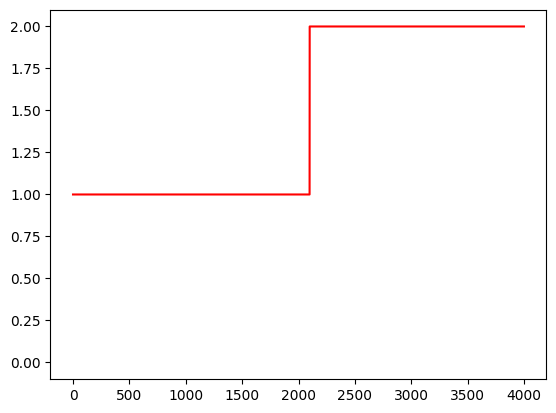

In [23]:
frames = [] # for storing the generated images
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for i in range(len(E_movie)):
    im, = ax.plot(E_movie[i],color = 'red')
    frames.append([im])
ani = animation.ArtistAnimation(fig, frames, interval=20, blit=True,
                                repeat_delay=1000)

# plt.show()
ani.save('fdtd.gif', writer='imagemagick', fps=30)